<a href="https://colab.research.google.com/github/ianjwhitehouse/FinalCSC148Project/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# US Election Breakdown
## By Ian

## Load Data

In [ ]:
import pandas as pd;
import matplotlib.pyplot as plt;

presData = pd.read_csv("/content/1976-2016-president.csv");

presData.head()

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party,writein,candidatevotes,totalvotes,version,notes
0,1976,Alabama,AL,1,63,41,US President,"Carter, Jimmy",democrat,False,659170,1182850,20171015,NaN
1,1976,Alabama,AL,1,63,41,US President,"Ford, Gerald",republican,False,504070,1182850,20171015,NaN
2,1976,Alabama,AL,1,63,41,US President,"Maddox, Lester",american independent party,False,9198,1182850,20171015,NaN
3,1976,Alabama,AL,1,63,41,US President,"Bubar, Benjamin """"Ben""""",prohibition,False,6669,1182850,20171015,NaN
4,1976,Alabama,AL,1,63,41,US President,"Hall, Gus",communist party use,False,1954,1182850,20171015,NaN


## Question 1
### Total votes cast over time

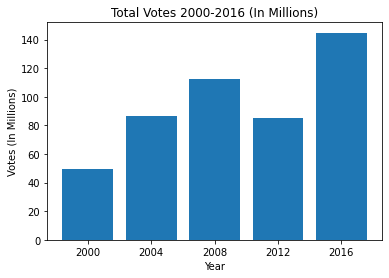

In [ ]:
quest1Data = presData.groupby(by=["writein"]);
quest1Data.get_group(True).head();
quest1Data = quest1Data.get_group(True);

votes = {}
for year, yearData in quest1Data.groupby(by=["year"]):
    votes[year] = yearData["totalvotes"].sum()

plt.bar([str(val) for val in list(votes.keys())[-5:]], [votes[k]/1_000_000 for k in list(votes.keys())[-5:]]);
plt.ylabel("Votes (In Millions)");
plt.xlabel("Year");
plt.title("Total Votes 2000-2016 (In Millions)");
plt.show();

## Conclusion:
In general, the number of votes cast have grown tremendously during the past 2 decades

## Question 2
### States: Texas, Georgia, Michigan, Wisconsin, Ohio

In [ ]:
I_STATES = ["TX", "GA", "MI", "WI", "OH"];
I_YEARS = [2000, 2004, 2008, 2012, 2016];

quest2Data = presData.groupby(by=["party"]);
quest2Data = pd.concat([quest2Data.get_group("democrat"), quest2Data.get_group("republican")]);
quest2Data.head()

# votes = [[year, state, dVote, rVote, tVote]]
votes = [];

for year, yearData in quest2Data.groupby(by=["year"]):
    if year in I_YEARS:
        for state, stateData in yearData.groupby(by=["state_po"]):
            if state in I_STATES:
                sD = stateData.groupby(by=["party"]);
                votes.append([year, state, sD.get_group("democrat")["candidatevotes"].sum(), sD.get_group("republican")["candidatevotes"].sum(), sD.get_group("democrat")["totalvotes"].sum()])

votes = pd.DataFrame(votes, columns=["year", "state", "dVote", "rVote", "tVote"]);
votes.head();

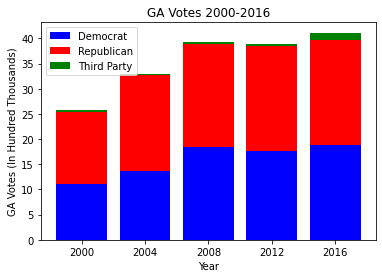

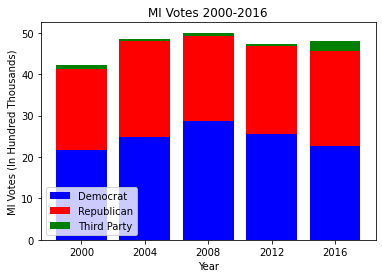

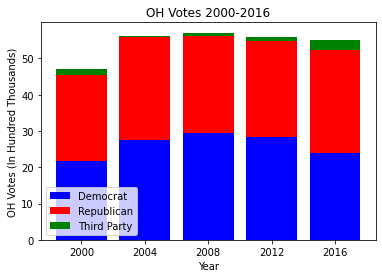

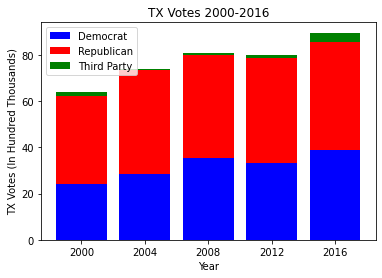

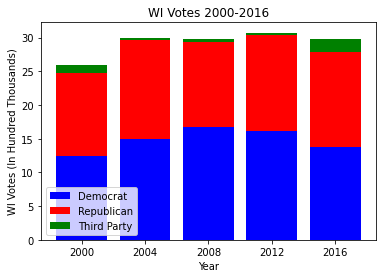

In [ ]:
for state, sD in votes.groupby(by="state"):
    # print(sD.head());
    dVotes = [val/100_000 for val in sD["dVote"]];
    rVotes = [val/100_000 for val in sD["rVote"]];
    tVotes = [val/100_000 for val in sD["tVote"] - sD["dVote"] - sD["rVote"]];
    
    plt.bar([str(val) for val in sD["year"]], dVotes, color="b");
    plt.bar([str(val) for val in sD["year"]], rVotes, color="r", bottom=dVotes);
    plt.bar([str(val) for val in sD["year"]], tVotes, color="g", bottom=[val[0] + val[1] for val in zip(dVotes, rVotes)]);
    
    plt.ylabel("%s Votes (In Hundred Thousands)" %state);
    plt.xlabel("Year");
    plt.title("%s Votes 2000-2016" %state);
    plt.legend(["Democrat", "Republican", "Third Party"]);
    plt.show();

## Conclusion:
As swing states, these states have seen their voting patterns change very little over the past 2 decades and, overall, both parties remain somewhat competitive

## Question 3
### Top five ideologically-homogeneous states
### The results from 2012 and 2016 were averaged in order to find this information

In [ ]:
I_YEARS = [2012, 2016];

quest2Data = presData.groupby(by=["party"]);
quest2Data = pd.concat([quest2Data.get_group("democrat"), quest2Data.get_group("democratic-farmer-labor"), quest2Data.get_group("republican")]);
quest2Data.head()

# votes = [[year, state, dVote, rVote, tVote]]
votes = [];

for year, yearData in quest2Data.groupby(by=["year"]):
    if year in I_YEARS:
        for state, stateData in yearData.groupby(by=["state_po"]):
            sD = stateData.groupby(by=["party"]);
            try:
                votes.append([year, state, sD.get_group("democrat")["candidatevotes"].sum(), sD.get_group("republican")["candidatevotes"].sum(), sD.get_group("democrat")["totalvotes"].sum()]);
            except:
                # WHY MINNISODA
                votes.append([year, state, sD.get_group("democratic-farmer-labor")["candidatevotes"].sum(), sD.get_group("republican")["candidatevotes"].sum(), sD.get_group("republican")["totalvotes"].sum()])

votes = pd.DataFrame(votes, columns=["year", "state", "dVote", "rVote", "tVote"]);
votes.head()

,year,state,dVote,rVote,tVote
0,2012,AK,122640,164676,300495
1,2012,AL,795696,1255925,2074338
2,2012,AR,394409,647744,1069468
3,2012,AZ,1025232,1233654,2299254
4,2012,CA,7854285,4839958,13038547


In [ ]:
# votes = [[state, dVote, rVote, tVote, homogeneity]]
nVotes = [];

for state, stateData in votes.groupby(by=["state"]):
    homoScore = max([stateData["dVote"].sum()/stateData["tVote"].sum(), stateData["rVote"].sum()/stateData["tVote"].sum()]);
    nVotes.append([state, stateData["dVote"].sum(), stateData["rVote"].sum(), stateData["tVote"].sum(), homoScore, stateData["dVote"].sum() > stateData["rVote"].sum()]);

votes = pd.DataFrame(nVotes, columns=["state", "dVote", "rVote", "tVote", "homogeneity", "dWon"]).sort_values(["homogeneity"], ascending=False);
votes.head();
vs = votes.groupby(by=["dWon"]);

### Democratic States

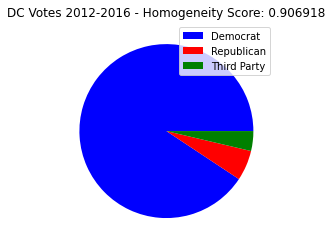

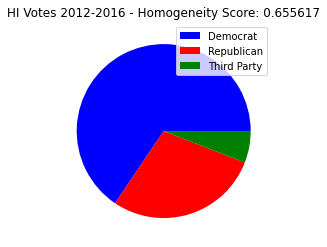

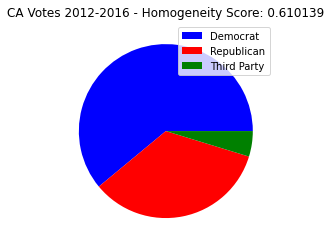

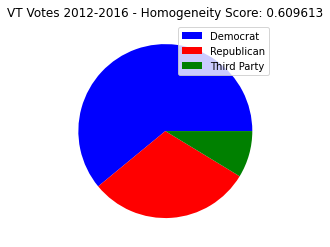

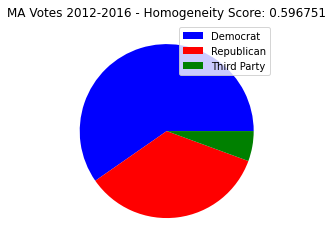

In [ ]:
partyVotes = vs.get_group(True);
for state in partyVotes.values.tolist()[:5]:
    dVotes = state[1]
    rVotes = state[2]
    tVotes = state[3] - (dVotes + rVotes);
    sumVotes = dVotes + rVotes + tVotes;
        
    plt.pie([dVotes, rVotes, tVotes], colors=["b", "r", "g"])
    plt.title("%s Votes 2012-2016 - Homogeneity Score: %f" %(state[0], state[-2]));
    plt.legend(["Democrat", "Republican", "Third Party"]);
        
    plt.show(); 

### Republican States

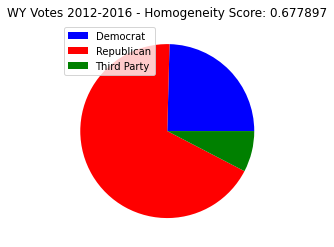

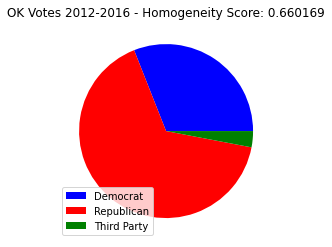

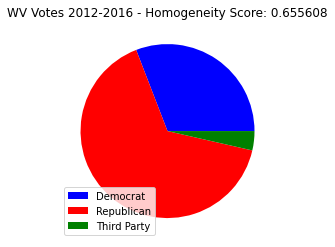

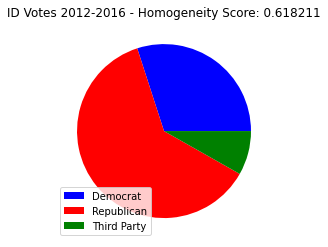

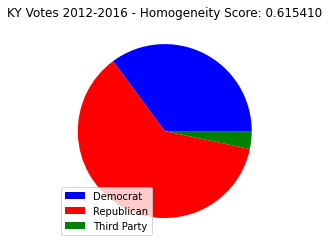

In [ ]:
partyVotes = vs.get_group(False);
for state in partyVotes.values.tolist()[:5]:
    dVotes = state[1]
    rVotes = state[2]
    tVotes = state[3] - (dVotes + rVotes);
    sumVotes = dVotes + rVotes + tVotes;
        
    plt.pie([dVotes, rVotes, tVotes], colors=["b", "r", "g"])
    plt.title("%s Votes 2012-2016 - Homogeneity Score: %f" %(state[0], state[-2]));
    plt.legend(["Democrat", "Republican", "Third Party"]);
        
    plt.show();

## Conclusion:
These states are definitely not swing states!  Over these ten states, there is little competition between the parties.  This could be because some states, like WY, matter very little to the final results or the party has lost interest in funding these states.  Often, parties send funding to already known swing states rather than try to create new swing states.

## Question 4
### State: Georgia

In [ ]:
I_STATES = "GA";

quest2Data = presData.groupby(by=["party"]);
quest2Data = pd.concat([quest2Data.get_group("democrat"), quest2Data.get_group("republican")]);
quest2Data.head()

# votes = [[year, state, dVote, rVote, tVote]]
votes = [];

for year, yearData in quest2Data.groupby(by=["year"]):
    for state, stateData in yearData.groupby(by=["state_po"]):
        if state in I_STATES:
            sD = stateData.groupby(by=["party"]);
            votes.append([year, state, sD.get_group("democrat")["candidatevotes"].sum(), sD.get_group("republican")["candidatevotes"].sum(), sD.get_group("democrat")["totalvotes"].sum()])

votes = pd.DataFrame(votes, columns=["year", "state", "dVote", "rVote", "tVote"]);
votes.head()

,year,state,dVote,rVote,tVote
0,1976,GA,979409,483743,1463152
1,1980,GA,890955,654168,1596805
2,1984,GA,706628,1068722,1776103
3,1988,GA,714792,1081331,1809672
4,1992,GA,1008966,995252,2321133


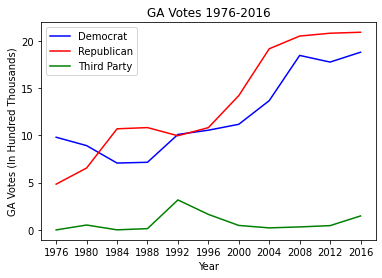

In [ ]:
for state, sD in votes.groupby(by="state"):
    # print(sD.head());
    dVotes = [val/100_000 for val in sD["dVote"]];
    rVotes = [val/100_000 for val in sD["rVote"]];
    tVotes = [val/100_000 for val in sD["tVote"] - sD["dVote"] - sD["rVote"]]

    plt.plot([str(val) for val in sD["year"]], dVotes, color="b");
    plt.plot([str(val) for val in sD["year"]], rVotes, color="r");
    plt.plot([str(val) for val in sD["year"]], tVotes, color="g");
    
    plt.ylabel("%s Votes (In Hundred Thousands)" %state);
    plt.xlabel("Year");
    plt.title("%s Votes 1976-2016" %state);
    plt.legend(["Democrat", "Republican", "Third Party"]);
    plt.show();

## Conclusion
This shows that Georgia is not as solidly red as many people make it out to be.  In this example, Georgia has clearly flipped often in the recent past and even in 2020.

## Question 6

In [ ]:
I_YEARS = [1992];

quest2Data = presData.groupby(by=["party"]);
quest2Data = pd.concat([quest2Data.get_group("democrat"), quest2Data.get_group("republican")]);
quest2Data.head()

# votes = [[year, state, dVote, rVote, tVote]]
votes = [];

for year, yearData in quest2Data.groupby(by=["year"]):
    if year in I_YEARS:
        for state, stateData in yearData.groupby(by=["state_po"]):
            sD = stateData.groupby(by=["party"]);
            votes.append([state, sD.get_group("democrat")["candidatevotes"].sum(), sD.get_group("republican")["candidatevotes"].sum(), sD.get_group("democrat")["totalvotes"].sum()])

votes = pd.DataFrame(votes, columns=["state", "dVote", "rVote", "tVote"]);
votes.head()

,state,dVote,rVote,tVote
0,AK,78294,102000,258506
1,AL,690080,804283,1688060
2,AR,505823,337324,950653
3,AZ,543050,572086,1486975
4,CA,5121325,3630574,11131721


In [ ]:
nMapStuff = [[v[0], (v[1]/(v[1] + v[2]))] for v in votes.values.tolist()];
mapStuff = pd.DataFrame(nMapStuff, columns=["state", "votes"]);
mapStuff.head()

,state,votes
0,AK,0.434257
1,AL,0.461789
2,AR,0.599923
3,AZ,0.486981
4,CA,0.585167


In [ ]:
import plotly.express as px

USA_USA_USA = px.choropleth(title="1992 Presidential Election", data_frame=mapStuff, locations="state", locationmode="USA-states", color='votes', color_continuous_scale="rdbu", range_color=(.45, .55), scope = 'usa');
USA_USA_USA.show()

## Conclusion
This map is interesting because it shows the country less segregated geographically than it is now.  The southern states, and the western states are seen on both sides of the aisle, and only the northeast and west are not competitive.

# Optional Objective 1
## Elections over time

In [ ]:
quest2Data = presData.groupby(by=["party"]);
quest2Data = pd.concat([quest2Data.get_group("democrat"), quest2Data.get_group("democratic-farmer-labor"), quest2Data.get_group("republican")]);
quest2Data.head()

# votes = [[year, state, dVote, rVote, tVote]]
votes = [];

for year, yearData in quest2Data.groupby(by=["year"]):
    for state, stateData in yearData.groupby(by=["state_po"]):
        sD = stateData.groupby(by=["party"]);
        try:
            votes.append([year, state, sD.get_group("democrat")["candidatevotes"].sum(), sD.get_group("republican")["candidatevotes"].sum(), sD.get_group("democrat")["totalvotes"].sum()]);
        except:
            # WHY MINNISODA
            votes.append([year, state, sD.get_group("democratic-farmer-labor")["candidatevotes"].sum(), sD.get_group("republican")["candidatevotes"].sum(), sD.get_group("republican")["totalvotes"].sum()])

votes = pd.DataFrame(votes, columns=["year", "state", "dVote", "rVote", "tVote"]);
votes.head()

,year,state,dVote,rVote,tVote
0,1976,AK,44058,71555,123574
1,1976,AL,659170,504070,1182850
2,1976,AR,498604,267903,767535
3,1976,AZ,295602,418642,742719
4,1976,CA,3742284,3882244,7803770


In [ ]:
votes = votes[["dVote", "rVote", "tVote", "state", "year"]];

mapStuff = [[v[3], v[4], (v[0]/(v[0] + v[1]))] for v in votes.values.tolist()];
mapStuff = pd.DataFrame(mapStuff, columns=["state", "year", "votes"]);

USA_USA_USA = px.choropleth(title="Presidential Elections Over Time", data_frame=mapStuff, locations="state", animation_frame="year", locationmode="USA-states", color='votes', color_continuous_scale="rdbu", range_color=(.35, .65), scope = 'usa');

USA_USA_USA.show()

# Optional Objective 2
## Party loyalty over time

### Part 1: Compares the percent of people who voted for either party's presidential candidate and the percent that voted for the party's congressional candidates

### Part 2: Compares the percent of people who voted for the winning party's presidential candidate to the percent that voted for the winning party's congressional candidates

### Part 3: Shows part 2 over time

The calculation is just presidential canidate's percent of vote/congressional canidate's percent of vote.  A number greater than 1 implies the presidential canidate is more popular than the congressional canidate.
For the second and third theory, it is just done for the winning party.
In the graph, a brown-green state prefered the winning party's (of that state) presidential canidate to the congressional canidate

In [ ]:
senData = pd.read_csv("/content/1976-2018-senate.csv", engine="python");
houseData = pd.read_csv("/content/1976-2018-house3.csv", engine="python");

# congressRaces = [[year, state, dVote, rVote, tVote]]

congressRaces = [];

for year, yearData in senData.groupby(by=["year"]):
    for state, stateData in yearData.groupby(by=["state_po"]):
        sD = stateData.groupby(by=["party"]);
        if "republican" in sD.groups.keys() and "democrat" in sD.groups.keys():
            congressRaces.append([year, state, sD.get_group("democrat")["candidatevotes"].sum(), sD.get_group("republican")["candidatevotes"].sum(), sD.get_group("republican")["totalvotes"].sum()]);

for year, yearData in houseData.groupby(by=["year"]):
    for state, stateData in yearData.groupby(by=["state_po"]):
        for districtData in stateData.groupby(by=["district"]):
            sD = stateData.groupby(by=["party"]);
            if "REPUBLICAN" in sD.groups.keys() and "DEMOCRAT" in sD.groups.keys():
                congressRaces.append([year, state, sD.get_group("DEMOCRAT")["candidatevotes"].sum(), sD.get_group("REPUBLICAN")["candidatevotes"].sum(), sD.get_group("REPUBLICAN")["totalvotes"].sum()]);

congressRaces = pd.DataFrame(congressRaces, columns=["year", "state", "dVote", "rVote", "tVote"]);
nCongressRaces = [];
for year, yearData in congressRaces.groupby(by=["year"]):
    if year in [1976, 1980, 1984, 1988, 1992, 1996, 2000, 2004, 2008, 2012, 2016]:
        for state, stateData in yearData.groupby(by=["state"]):
            nCongressRaces.append([year, state, stateData["dVote"].sum(), stateData["rVote"].sum(), stateData["tVote"].sum()]);
congressRaces = pd.DataFrame(nCongressRaces, columns=["year", "state", "dVote", "rVote", "tVote"]);
congressRaces.head()

,year,state,dVote,rVote,tVote
0,1976,AK,34194,83722,118208
1,1976,AL,4669364,2204790,4564504
2,1976,AR,1043992,301540,1345560
3,1976,AZ,1823322,1683148,3657218
4,1976,CA,181708794,142226947,323922464


In [ ]:
quest2Data = presData.groupby(by=["party"]);
quest2Data = pd.concat([quest2Data.get_group("democrat"), quest2Data.get_group("democratic-farmer-labor"), quest2Data.get_group("republican")]);

# votes = [[year, state, dVote, rVote, tVote]]
votes = [];

for year, yearData in quest2Data.groupby(by=["year"]):
    if year in [1976, 1980, 1984, 1988, 1992, 1996, 2000, 2004, 2008, 2012, 2016]:
        for state, stateData in yearData.groupby(by=["state_po"]):
            sD = stateData.groupby(by=["party"]);
            try:
                votes.append([year, state, sD.get_group("democrat")["candidatevotes"].sum(), sD.get_group("republican")["candidatevotes"].sum(), sD.get_group("democrat")["totalvotes"].sum()]);
            except:
                # WHY MINNISODA
                votes.append([year, state, sD.get_group("democratic-farmer-labor")["candidatevotes"].sum(), sD.get_group("republican")["candidatevotes"].sum(), sD.get_group("republican")["totalvotes"].sum()])

presVotes = pd.DataFrame(votes, columns=["year", "state", "dVote", "rVote", "tVote"]);
presVotes.head()

,year,state,dVote,rVote,tVote
0,1976,AK,44058,71555,123574
1,1976,AL,659170,504070,1182850
2,1976,AR,498604,267903,767535
3,1976,AZ,295602,418642,742719
4,1976,CA,3742284,3882244,7803770


In [ ]:
overAllLoyalty = [];
for year, yearData in congressRaces.groupby(by=["year"]):
    
    curYearPres = presVotes.groupby(by=["year"]).get_group(year);
    presDemPercent = curYearPres["dVote"].sum()/curYearPres["tVote"].sum();
    presRepPercent = curYearPres["rVote"].sum()/curYearPres["tVote"].sum();
    
    congressDemPercent = yearData["dVote"].sum()/yearData["tVote"].sum();
    congressRepPercent = yearData["rVote"].sum()/yearData["tVote"].sum();
    
    overAllLoyalty.append([year, congressDemPercent, presDemPercent, congressRepPercent, presRepPercent]);

loyalty = pd.DataFrame(overAllLoyalty, columns=["year", "cDPer", "pDPer", "cRPer", "pRPer"]);
loyalty.head()

,year,cDPer,pDPer,cRPer,pRPer
0,1976,0.581113,0.498527,0.436769,0.476351
1,1980,0.506435,0.410199,0.492853,0.504558
2,1984,0.540797,0.404186,0.496928,0.584609
3,1988,0.589390,0.455488,0.488333,0.531110
4,1992,0.519156,0.428842,0.450026,0.370927


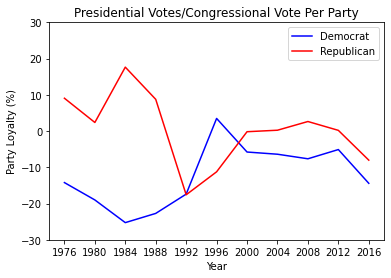

In [ ]:
demLoyalty = [((i[0]/i[1]) * 100) - 100 for i in zip([val for val in loyalty["pDPer"]], [val for val in loyalty["cDPer"]])];
repLoyalty = [((i[0]/i[1]) * 100) - 100 for i in zip([val for val in loyalty["pRPer"]], [val for val in loyalty["cRPer"]])];

plt.plot([str(val) for val in loyalty["year"].drop_duplicates()], demLoyalty, color="b");
plt.plot([str(val) for val in loyalty["year"].drop_duplicates()], repLoyalty, color="r");
    
plt.ylabel("Party Loyalty (%)");
plt.xlabel("Year");
plt.title("Presidential Votes/Congressional Vote Per Party");
plt.legend(["Democrat", "Republican"]);
plt.ylim(-30, 30);
plt.show();

## Conclusion
This shows that, over time, the two voting base has become less loyal to the party, especially the Republicans. This means that local Congressional candidates are more likely to get votes than the party's presidential candidate

## Top 5 most loyal states
### 2016

In [ ]:
loyalty = [];
for year, yearData in congressRaces.groupby(by=["year"]):
    for state, stateData in yearData.groupby(by=["state"]):
        curYearPres = presVotes.groupby(by=["year"]).get_group(year).groupby(by=["state"]).get_group(state);
        
        if curYearPres["rVote"].sum() > curYearPres["dVote"].sum():
            congressPercent = stateData["rVote"].sum()/stateData["tVote"].sum();
            presPercent = curYearPres["rVote"].sum()/curYearPres["tVote"].sum()
            loyalty.append([year, state, presPercent/congressPercent]);
        else:
            congressPercent = stateData["dVote"].sum()/stateData["tVote"].sum();
            presPercent = curYearPres["dVote"].sum()/curYearPres["tVote"].sum()
            loyalty.append([year, state, presPercent/congressPercent]);
loyalty = pd.DataFrame(loyalty, columns=["year", "state", "loyalty percent"]);

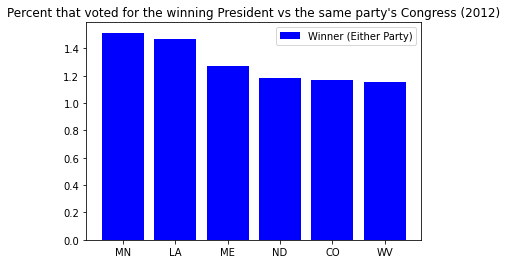

In [ ]:
for state in loyalty.groupby(by=["year"]).get_group(2012).sort_values(["loyalty percent"], ascending=False).values.tolist()[:6]:
    plt.bar(state[1], state[2], color="b");
    
plt.title("Percent that voted for the winning President vs the same party's Congress (2012)");
plt.legend(["Winner (Either Party)"]);
    
plt.show();

## Conclusion
This is very interesting because it shows that Obama outperformed his own party by nearly 150% in states like Maine and Minnesota, and even states like Louisiana, which went Republican

## Party loyalty by state

In [ ]:
USA_USA_USA = px.choropleth(title="Presidential Election by Year", data_frame=loyalty, locations="state", animation_frame="year", locationmode="USA-states", color='loyalty percent', color_continuous_scale=([[0, 'red'], [1, 'green']]), range_color=(.5, 1.5), scope = 'usa');
USA_USA_USA.show()